<a href="https://colab.research.google.com/github/sunsetpeak1861/Data_VIsualization/blob/master/200328SGD_GIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qiita
kenmatsu4
@kenmatsu4
2017年05月29日に更新
確率的勾配降下法とは何か、をPythonで動かして解説する

https://qiita.com/kenmatsu4/items/d282054ddedbd68fecb0

ソースコード
https://gist.github.com/matsuken92/f92f8e8e4a1f924e6d99#file-1-dim-steepest-descent-py

In [0]:
# https://qiita.com/skotaro/items/430e03b61cc6f069d263
import matplotlib.animation as anm
from matplotlib.animation import PillowWriter

1-dim steepest descent.py

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1507328/45929032 bytes (3.3%)5177344/45929032 bytes (11.3%)9052160/45929032 bytes (19.7%)12902400/45929032 bytes (28.1%)16809984/45929032 bytes (36.6%)20652032/45929032 bytes (45.0%)24461312/45929032 bytes (53.3%)28377088/45929032 bytes (61.8%)32268288/45929032 bytes (70.3%)36102144/45929032 bytes (78.6%)39993344/45929032 bytes (87.1%)43868160/45929032 bytes (95.5%)

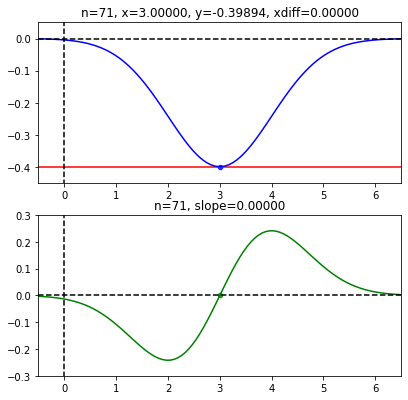

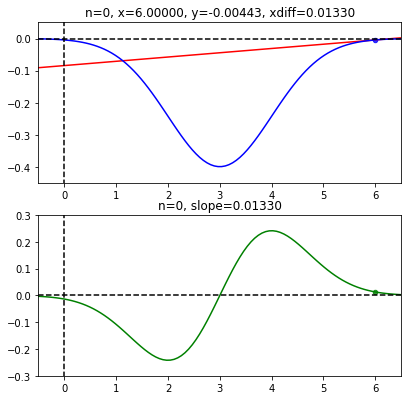

In [0]:
# 1-dim steepest descent.py

import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import *
from matplotlib import animation as ani

sigma = 1
mu     = 3

def norm_dist_neg(x):
    return -1./(np.sqrt(2 * np.pi) * sigma)* np.exp(-0.5*((x-mu)**2)/((sigma**2)))

def norm_dist_1st_div_neg(x):
    return (x-float(mu))/(np.sqrt(2 * np.pi) * sigma**3) * np.exp(-0.5*(x-mu)**2/((sigma**2)))

x_low  = -3.5
x_high = 3.5
x_low  += mu
x_high += mu

x    = np.linspace(x_low,x_high,100)
y    = norm_dist_neg(x) 
y1  = norm_dist_1st_div_neg(x)

def plot_line(slope, x, y):
    
    xbase = np.linspace(x_low, x_high, 100)
    b = - x * slope + y
    y1 = slope * xbase + b
    plt.plot(xbase,y1, c="r")
    
def calculate(init_x = 0,nmax=1000, learning_ratio = 1, precision=8):
    
    list_xs    = []
    list_ys    = []
    list_slope = []
    list_xdiff = []
    xs = init_x
    i = 0
    
    for i in range(nmax):
        ys = norm_dist_neg(xs)
        slope = norm_dist_1st_div_neg(xs)
        list_xs.append(xs)
        list_ys.append(ys)
        list_slope.append(slope)
        
        x_diff = learning_ratio * slope
        xs -= x_diff
        list_xdiff.append(x_diff)
        
        if abs(x_diff) < (0.1**precision) and (i != 0) :
            break
    
    ret_dict = {}
    ret_dict['num'] = i
    ret_dict['list_xs'] = list_xs
    ret_dict['list_ys'] = list_ys
    ret_dict['list_slope'] = list_slope
    ret_dict['list_xdiff'] = list_xdiff
    
    return ret_dict



def animate(nframe):
    xs = ret_dict['list_xs'][nframe] 
    ys = ret_dict['list_ys'][nframe] 
    slope = ret_dict['list_slope'][nframe] #norm_dist_1st_div_neg(xs)
    xdiff = ret_dict['list_xdiff'][nframe]
    
    plt.clf()
    
    # display norm dist 
    plt.subplot(2, 1, 1)
    plt.title("n=%d, x=%.5f, y=%.5f, xdiff=%.5f" % (nframe,xs, ys, xdiff))
    plot_line(slope, xs, ys)
    plt.scatter(xs, ys, c="b", s=20, alpha=0.8)
    plt.plot([xs, xs-xdiff],[ys,ys], c="k")
    plt.plot([xs-xdiff, xs-xdiff],[ys,ys-(xdiff*slope)], c="k")
    plt.plot(x, y, c="b")
    plt.plot([x_low,x_high],[0,0],  "--", c="k")
    plt.plot([0,0],[-1, 1], "--", c="k")
    plt.xlim(x_low,x_high)
    plt.ylim(-0.45, 0.05)
    
    # display deviation of norm dist
    plt.subplot(2, 1, 2)
    plt.plot(x, y1, c="g")
    plt.xlim(x_low,x_high)
    plt.ylim(-0.3, 0.3)
    plt.title("n=%d, slope=%.5f" % (nframe,xdiff))
    plt.scatter(xs, slope, c="g", s=20, alpha=0.8)
    plt.plot([x_low,x_high],[0,0],  "--", c="k")
    plt.plot([0,0],[-1, 1], "--", c="k")

for i in [0.0, 6.0]:
    init = 6.0
    ret_dict = calculate(init_x=init)
    print("calc finish.")
    fig = plt.figure(figsize=(6.5,6.5))
    print(ret_dict['num'])
    # anim = ani.FuncAnimation(fig, animate, frames=ret_dict['num'], blit=True)
    anim = ani.FuncAnimation(fig, animate, frames=ret_dict['num'], blit=False)

    # anim.save('normdist_decent_%.1f_anim.mp4' % init, fps=5)

    # anim.save('SGD_anim.gif', writer='pillow', fps=30, dpi=128)
    anim.save('normdist_decent_%.1f_anim.gif', writer='pillow', fps=6, dpi=256)
    
    # clip = VideoFileClip("normdist_decent_%.1f_anim.mp4" % init)
    # clip.write_gif("normdist_decent_%.1f_anim.gif" % init)

2-dim steepest descent_normdist.py

break


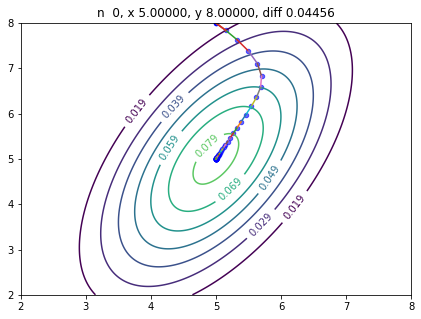

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import *
from matplotlib import animation as ani

sigma = 1
mu     = 3

# set graph range
x_low  = 2
x_high = 8
y_low  = 2
y_high = 8 

# set field
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# set parameters
D = 2
mu_x = 5 #np.average(x)
mu_y = 5 #np.average(y)
cov = [[1.5,  1.4],
       [1.4,  3.8]]
cov_inv = np.linalg.inv(cov)
cov_det = np.linalg.det(cov)
c = 1./((2 * np.pi) ** (D/2) * np.sqrt(cov_det))
Z = c * np.exp(-0.5 * ((cov_inv[0,0] * (X-mu_x)**2) + \
                       (2 * cov_inv[0, 1]) * (X-mu_x)*(Y-mu_y) + \
                       (cov_inv[1,1] * (Y-mu_y) ** 2)))

def get_grad_vec(x, y):
    c = 1./((2 * np.pi) ** (D/2) * np.sqrt(cov_det)) 
    Z = c * np.exp(-0.5 * ((cov_inv[0,0] * (x-mu_x)**2) + \
                       (2 * cov_inv[0, 1]) * (x-mu_x)*(y-mu_y) + \
                       (cov_inv[1,1] * (y-mu_y) ** 2)))
    
    grad_x = Z * 2 * ((x -mu_x)*cov_inv[0,0] + (y-mu_y)*cov_inv[0,1])
    grad_y = Z * 2 * ((x -mu_x)*cov_inv[1,0] + (y-mu_y)*cov_inv[1,1])
    return [grad_x, grad_y]

def calc_2val_norm(init_x=3, init_y=3, learning_ratio = 5, precision=5):
    list_xs   = []
    list_ys   = []
    list_nxs  = []
    list_nys  = []
    list_diff = []
    xs = init_x
    ys = init_y
    i = 0
    
    for i in range(500):
        grad_vec = get_grad_vec(xs, ys)
        n_xs = xs - learning_ratio*grad_vec[0]
        n_ys = ys - learning_ratio*grad_vec[1]
        
        list_xs.append(xs)
        list_ys.append(ys)
        list_nxs.append(n_xs)
        list_nys.append(n_ys)

        # judge convergence
        diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
        list_diff.append(diff)
        if diff < 0.1**precision:
            print("break")
            break
        
        xs = n_xs
        ys = n_ys
        
    ret_dict = {}
    ret_dict['num'] = i+1
    ret_dict['list_xs'] = list_xs
    ret_dict['list_ys'] = list_ys
    ret_dict['list_nxs'] = list_nxs
    ret_dict['list_nys'] = list_nys
    ret_dict['list_diff'] = list_diff
    
    return ret_dict

def animate(i):
    #print "i %d" % i
    list_xs = ret_dict['list_xs']
    list_ys = ret_dict['list_ys']
    list_nxs = ret_dict['list_nxs']
    list_nys = ret_dict['list_nys']
    list_diff = ret_dict['list_diff']
    
    # draw graph
    plt.scatter(list_xs[i], list_ys[i], s=20, c="b", alpha=0.6)
    plt.plot([list_xs[i], list_nxs[i]], [list_ys[i], list_nys[i]])
    plt.title("n %2d, x %.5f, y %.5f, diff %.5f" % (i, list_xs[i], list_ys[i], list_diff[i]))
    
fig = plt.figure(figsize=(7,5))
ret_dict = calc_2val_norm(init_x=5, init_y=8)
interval = np.arange(0.019, 0.1, 0.01)
CS = plt.contour(X, Y, Z, interval)
plt.clabel(CS, inline=1, fontsize=10)
# anim = ani.FuncAnimation(fig, animate, frames=ret_dict['num'], blit=True)
anim = ani.FuncAnimation(fig, animate, frames=ret_dict['num'], blit=False)

# anim.save('bi-normdist_decent_anim.mp4', fps=2.5)
anim.save('bi-normdist_decent_anim.gif', writer='pillow', fps=6, dpi=256)

    
# clip = VideoFileClip("bi-normdist_decent_anim.mp4")
# clip.write_gif("bi-normdist_decent_anim.gif")

2-dim steepest descent_quadrant.py

100


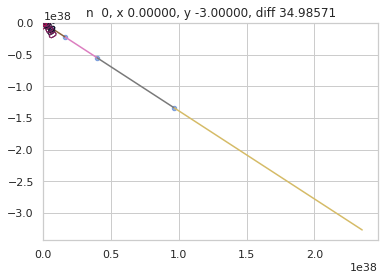

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import *
from matplotlib import animation as ani

# set graph range
x_low  = -3
x_high = 3
y_low  = -3
y_high = 3

# set field
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# set parameters
# Z = 3* X ** 2  5 * Y ** 2 - 6 * X * Y
Z = 3* X ** 2 - 5 * Y ** 2 - 6 * X * Y


def get_grad_vec(x, y):
    grad_x =  6 * x - 6 * y
    grad_y = 10 * y - 6 * x
    return [grad_x, grad_y]

def calc_2val_norm(init_x=3, init_y=3, learning_ratio = .1, precision=3):
    list_xs   = []
    list_ys   = []
    list_nxs  = []
    list_nys  = []
    list_diff = []
    xs = init_x
    ys = init_y
    i = 0
    for i in range(100):

        grad_vec = get_grad_vec(xs, ys)
        n_xs = xs + learning_ratio*grad_vec[0]
        n_ys = ys + learning_ratio*grad_vec[1]
        
        list_xs.append(xs)
        list_ys.append(ys)
        list_nxs.append(n_xs)
        list_nys.append(n_ys)

        # judge convergence
        diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
        list_diff.append(diff)
        if diff < 0.1**precision:
            print("break")
            break
        
        xs = n_xs
        ys = n_ys
        
    ret_dict = {}
    ret_dict['num'] = i+1
    ret_dict['list_xs'] = list_xs
    ret_dict['list_ys'] = list_ys
    ret_dict['list_nxs'] = list_nxs
    ret_dict['list_nys'] = list_nys
    ret_dict['list_diff'] = list_diff
    
    return ret_dict

def animate(i):
    list_xs = ret_dict['list_xs']
    list_ys = ret_dict['list_ys']
    list_nxs = ret_dict['list_nxs']
    list_nys = ret_dict['list_nys']
    list_diff = ret_dict['list_diff']
    
    if i == 0:
        plt.scatter(list_xs[i], list_ys[i], s=20, c="b", alpha=0.6)
        plt.title("n %2d, x %.5f, y %.5f, diff %.5f" % (i, list_xs[i], list_ys[i], list_diff[i]))
    else:
        # draw graph
        plt.scatter(list_xs[i-1], list_ys[i-1], s=20, c="b", alpha=0.6)
        plt.plot([list_xs[i-1], list_nxs[i-1]], [list_ys[i-1], list_nys[i-1]])
        plt.title("n %2d, x %.5f, y %.5f, diff %.5f" % (i, list_xs[i-1], list_ys[i-1], list_diff[i-1]))
    
fig = plt.figure(figsize=(6,4))
ret_dict = calc_2val_norm(init_x=0, init_y=-3, learning_ratio=.1)
interval = [x ** 2 for x in range(10)]
CS = plt.contour(X, Y, Z, interval)
plt.clabel(CS, inline=1, fontsize=10)
print(ret_dict['num'])
# anim = ani.FuncAnimation(fig, animate, frames=ret_dict['num'], blit=True)
anim = ani.FuncAnimation(fig, animate, frames=ret_dict['num'], blit=False)

# anim.save('quadratic_decent_anim.mp4', fps=2.5)

anim.save('quadratic_decent_anim.gif', writer='pillow', fps=6, dpi=256)
    
# clip = VideoFileClip("quadratic_decent_anim.mp4")
# clip.write_gif("quadratic_decent_anim.gif")

2-dim stocastic descent_quadrant.py

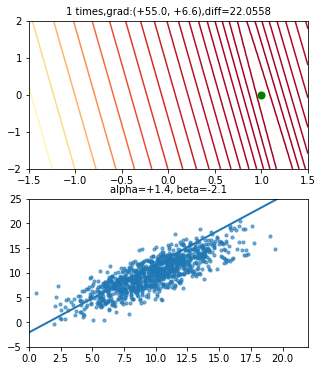

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani
np.random.seed()

def vec_shuffle(vec):
    ind = range(len(vec))
    np.random.shuffle(ind)
    return np.array([vec[i] for i in ind])

# vec: target vector, from_ind: index value (from 0)
def pickup_two_sample(vec, from_ind):
    return vec[from_ind:from_ind+2]

def random_multi_sample_picker(vec, n=2):
    ret_list = []
    for i in range(n):
        ret_list.append(vec[np.random.randint(len(vec))])
    
    return np.array(ret_list)
    
def generate_train_data():
    ''' Create Train Data
    # y = x + 0 + e
    # e = N(0, 2) - normal distribution
    np.random.seed(10)  # For fix random values
    '''
    
    N = 1000
    alpha = 1
    beta  = 0
    e = np.random.normal(0, 2, N)
    x = np.random.normal(10,3,N)
    y = alpha*x + beta + e
    np.random.seed()
    np.random.seed()
    return np.c_[x,y]

def displayScatter():
    plt.figure(figsize=(9,6))
    plt.xlim(0, 22)
    plt.scatter(data[:,0],data[:,1], s=10, alpha=0.6)
    
ratio = 2
alpha = 1
beta  = 0
a_low  =  -1.5
a_high =  1.5
b_low  =  -2
b_high =  2

af = np.linspace(a_low, a_high, 100)
bf = np.linspace(b_low, b_high, 100)
A, B = np.meshgrid(af, bf)
data = generate_train_data()

maxnum = 500

# starting point
init_a = -1.5
init_b = -1.5

a = init_a
b = init_b
def animate(i):
    global a
    global b
    global alpha
    global beta

    # ------------- Logic Part ------------------# 
    d = random_multi_sample_picker(data,3)
    x1, y1, x2, y2, x3, y3 = d[0,0], d[0,1], d[1,0], d[1,1], d[2,0], d[2,1]
    
    Z = (y1 - A*x1 - B) ** 2 + (y2 - A*x2 - B) ** 2  + (y3 - A*x3 - B) ** 2 
    
    grad_a = np.sum([(2*a*(x**2) - 2*x*y + 2*b*x) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])
    grad_b = np.sum([(-2*y + 2*a*x + 2*b) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])
    
    current_z = (y1 - a*x1 - b) ** 2 + (y2 - a*x2 - b) ** 2  + (y3 - a*x3 - b) ** 2 
    next_a = a -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_a 
    next_b = b -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_b 
    
    diff = np.sqrt((next_a-a)**2 + (next_b-b)**2)    # Distance between current and true position
    
    # -------------  Graph Drawing part ------------------# 
    # Countour drawing
    plt.clf()
    plt.subplot(2,1,1)
    plt.xlim(a_low,a_high)
    plt.ylim(b_low,b_high)
    ex = 5.
    mul = 10
    edge = 3000**(1/ex)/mul
    interval = [((mul*x)**ex) for x in np.linspace(0,edge,30)]   # In order to draw contour line as same interval for each line
    plt.title("%d times,grad:(%+04.1f, %0+3.1f),diff=%.4f" % (i+1, grad_a, grad_b, diff), fontsize=10)
  
    CS = plt.contour(A, B, Z, interval,  cmap="RdYlBu")
    
    # Position marker
    plt.scatter(a, b, s=40, c="b")                  # Current position
    plt.plot([a, next_a],[b, next_b], c="k")     # Line for next position
    plt.scatter(alpha, beta, s=50, c="g")        # True position
  
    if diff < 0.001:
        print("break.")
        #break;
    
    # Drawing scatter plot for indicating regression line transition
    plt.subplot(2,1,2)
    d = generate_train_data()
    plt.xlim(0, 22)
    plt.ylim(-5,25)
    plt.title("alpha=%+04.1f, beta=%+02.1f" % (a, b), fontsize=10)
    plt.scatter(d[:,0],d[:,1], s=10, alpha=0.6)
    plt.plot([0,22],[b,22*a+b], linewidth=2)
    
    a = next_a
    b = next_b

fig = plt.figure(figsize=(5, 6))
# anim = ani.FuncAnimation(fig, animate, frames=80, blit=True)
anim = ani.FuncAnimation(fig, animate, frames=80, blit=False)

# anim.save('SGD_anim.gif', writer='imagemagick', fps=6, dpi=64)
anim.save('2-dim stocastic descent_quadrant.gif', writer='pillow', fps=6, dpi=64)

SGD

https://github.com/matsuken92/Qiita_Contents/blob/master/General/SGD-lm.ipynb

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys, os
import numpy as np

import numpy.__config__
import numpy.random as rd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import  animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline

import IPython.display as ipyd
plt.rcParams["patch.force_edgecolor"] = True

In [0]:
def random_multi_sample_picker_idx(vec, n=2):
  ret_list = []
  n_data = len(vec)
  idx = np.arange(n_data)
  rd.shuffle(idx)
  return idx[:n]

def generate_train_data(alpha, beta):
  ''' Create Train Data '''

  N = 1000
  e = np.random.normal(0, 2, N)
  x = np.random.normal(10, 3, N)
  y = alpha*x + beta + e
  return np.c_[x, y]

In [0]:
def animate(i):
  global a, b, frame
  print("\r progress: ({}/{})".format(i, frames), end="")

  # ------------ Logic Part ------------------ # 
  idx = random_multi_sample_picker_idx(data, 3)
  d = data[idx]
  x1, y1, x2, y2, x3, y3 = d[0,0],d[0,1],d[1,0],d[1,1],d[2,0],d[2,1]

  Z = (y1 - A*x1 - B) ** 2 + (y2 - A*x2 - B) ** 2 + (y3 - A*x3 - B) ** 2

  grad_a = np.sum([(2*a*(x**2) - 2*x*y + 2*b*x) for x, y in [[x1,y1],[x2,y2],[x3,y3]]])
  grad_b = np.sum([(-2*y + 2*a*x + 2*b) for x, y in [[x1,y1],[x2,y2],[x3,y3]]])


  current_z = (y1 - a*x1 - b) ** 2 + (y2 - a*x2 - b) ** 2 + (y3 - a*x3 - b) ** 2
  next_a = a - ((i+1) ** (-1)) * (1/np.sqrt(np.abs(current_z))) * grad_a
  next_b = b - ((i+1) ** (-1)) * (1/np.sqrt(np.abs(current_z))) * grad_b

  learning_rate = (frames-i)/frames
  diff = np.sqrt((next_a-a) ** 2 + (next_b-b)**2) * learning_rate # Distance between current and true position
                 
  # -------------- Graph Drawing part ----------------- # 
  # Countour drawing
  plt.clf()
  plt.subplot(2,1,1)
  plt.xlim(a_low,a_high)
  plt.ylim(b_low,b_high)
  ex = 5.
  mul = 10
  edge = 3000 ** (1/ex)/mul
  interval = [((mul*x)**ex) for x in np.linspace(0,edge,30)] # In order to draw contour line as same interval for each lines
  # title = "%d times, grad:(%+04.1f, %0+3.1f),diff=%.4f" % (i+1, grad_a, grad_b, diff)
  title = "{0:4d} times,grad:({1:8.1f}, {2:8.1f}),diff={3:8.4f}".format(i+1, grad_a, grad_b, diff)
  plt.title(title, fontsize=10)

  CS = plt.contour(A, B, Z, interval, cmap="RdYlBu", lw=1)
  for zc in CS.collections:
    plt.setp(zc, linewidth=0.5)

  # Position marker
  plt.scatter(a, b, s=40, c="b")        # Current Position
  plt.plot([a, next_a], [b, next_b], c="k")    #  Line for next position
  plt.scatter(true_a, true_b, s=50, c="g")     # True position

  if diff < 0.0001:
    print("break.")
    # break

  # Drawing scatter plot for indicating regression line transition
  plt.subplot(2, 1, 2)
  # d = generate_train_data()
  plt.xlim(0, 22)
  plt.ylim(-5, 25)
  plt.title("alpha=%+04.1f,beta=%+02.1f" % (a, b), fontsize=10)
  plt.scatter(data[:,0],data[:,1],s=8,alpha=0.6)
  plt.scatter(data[idx,0],data[idx,1],c="r",s=20,alpha=0.6)
  plt.plot([0,22],[b,22*a+b],"g",linewidth=2)

  a = next_a
  b = next_b
  

In [0]:
def animate(i):
    global a, b, frame
    print("\r progress: ({}/{})".format(i, frames), end="")
    
    # ------------- Logic Part ------------------# 
    idx = random_multi_sample_picker_idx(data, 3)
    d = data[idx]
    x1, y1, x2, y2, x3, y3 = d[0,0], d[0,1], d[1,0], d[1,1], d[2,0], d[2,1]

    Z = (y1 - A*x1 - B) ** 2 + (y2 - A*x2 - B) ** 2  + (y3 - A*x3 - B) ** 2 

    grad_a = np.sum([(2*a*(x**2) - 2*x*y + 2*b*x) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])
    grad_b = np.sum([(-2*y + 2*a*x + 2*b) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])

    current_z = (y1 - a*x1 - b) ** 2 + (y2 - a*x2 - b) ** 2  + (y3 - a*x3 - b) ** 2 
    next_a = a -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_a 
    next_b = b -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_b 

    learning_rate = (frames-i)/frames 
    diff = np.sqrt((next_a-a)**2 + (next_b-b)**2) * learning_rate # Distance between current and true position

    # -------------  Graph Drawing part ------------------# 
    # Countour drawing
    plt.clf()
    plt.subplot(2,1,1)
    plt.xlim(a_low,a_high)
    plt.ylim(b_low,b_high)
    ex = 5.
    mul = 10
    edge = 3000**(1/ex)/mul
    interval = [((mul*x)**ex) for x in np.linspace(0,edge,30)]   # In order to draw contour line as same interval for each line
    #title = "%d times,grad:(%+04.1f, %0+3.1f),diff=%.4f" % (i+1, grad_a, grad_b, diff)
    title = "{0:4d} times,grad:({1:8.1f}, {2:8.1f}),diff={3:8.4f}".format(i+1, grad_a, grad_b, diff)
    plt.title(title, fontsize=10)

    CS = plt.contour(A, B, Z, interval, cmap="RdYlBu", lw=1)
    for zc in CS.collections:
        plt.setp(zc, linewidth=0.5)

    # Position marker
    plt.scatter(a, b, s=40, c="b")                  # Current position
    plt.plot([a, next_a],[b, next_b], c="k")        # Line for next position
    plt.scatter(true_a, true_b, s=50, c="g")        # True position

    if diff < 0.0001:
        print ("break.")
        #break;

    # Drawing scatter plot for indicating regression line transition
    plt.subplot(2,1,2)
    #d = generate_train_data()
    plt.xlim(0, 22)
    plt.ylim(-5,25)
    plt.title("alpha=%+04.1f, beta=%+02.1f" % (a, b), fontsize=10)
    plt.scatter(data[:,0],data[:,1], s=8,alpha=0.6)
    plt.scatter(data[idx,0],data[idx,1], c="r", s=20, alpha=0.6)
    plt.plot([0,22],[b,22*a+b],"g", linewidth=2)

    a = next_a
    b = next_b

 progress: (0/120)

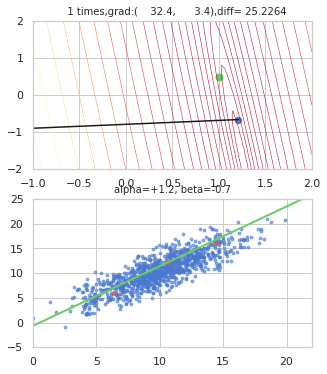

In [0]:
# 乱数シードの設定
np.random.seed(71)

# 真のパラメータ
true_a, true_b = 1, 0.5

# 描画幅
a_low, a_high  =  -1, 2
b_low, b_high  =  -2, 2

# 描画用フィールドデータの生成
af = np.linspace(a_low, a_high, 100)
bf = np.linspace(b_low, b_high, 100)
A, B = np.meshgrid(af, bf)

# 初期値
init_a = -1.5
init_b = -1.5

# 初期値を変数に代入
a = init_a
b = init_b

# テストデータの生成
data = generate_train_data(true_a, true_b)

# イテレーション回数
#frames = 250
frames = 120

fig = plt.figure(figsize=(5, 6))
anim = ani.FuncAnimation(fig, animate, frames=frames)
#anim.save('SGD_anim.gif', writer='imagemagick', fps=6, dpi=64)
# anim.save('SGD_anim.gif', writer='imagemagick', fps=6, dpi=128)

# https://qiita.com/skotaro/items/430e03b61cc6f069d263
import matplotlib.animation as anm
from matplotlib.animation import PillowWriter
# anim.save(figdir/'normaldist_kde_anim.gif', writer='pillow') # fpsはデフォルトの5

# anim.save('SGD_anim.gif', writer='pillow', fps=30, dpi=128)
anim.save('SGD_anim2.gif', writer='pillow', fps=6, dpi=256)



In [0]:
np.random.seed(None)
# ipyd.Image(url='SGD_anim.gif?{}'.format(rd.uniform()),height=400,width=400)
ipyd.Image(url='SGD_anim2.gif'.format(rd.uniform()),height=400,width=400)
